<a href="https://colab.research.google.com/github/MarvinLok/Algo-Trading/blob/main/higher_high_lower_low_higher_low_lower_high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
!pip install yfinance
import yfinance as yf
!pip install mplfinance
import mplfinance as mpf
from scipy.signal import argrelextrema
from collections import deque

In [48]:
SPY_adj = yf.download(tickers="SPY",start="2021-01-01", end="2024-01-01",interval="1d",auto_adjust=True,multi_level_index=False)
data = SPY_adj

[*********************100%***********************]  1 of 1 completed


**First find all the local minimum and local maximum by looking N data points on both sides**

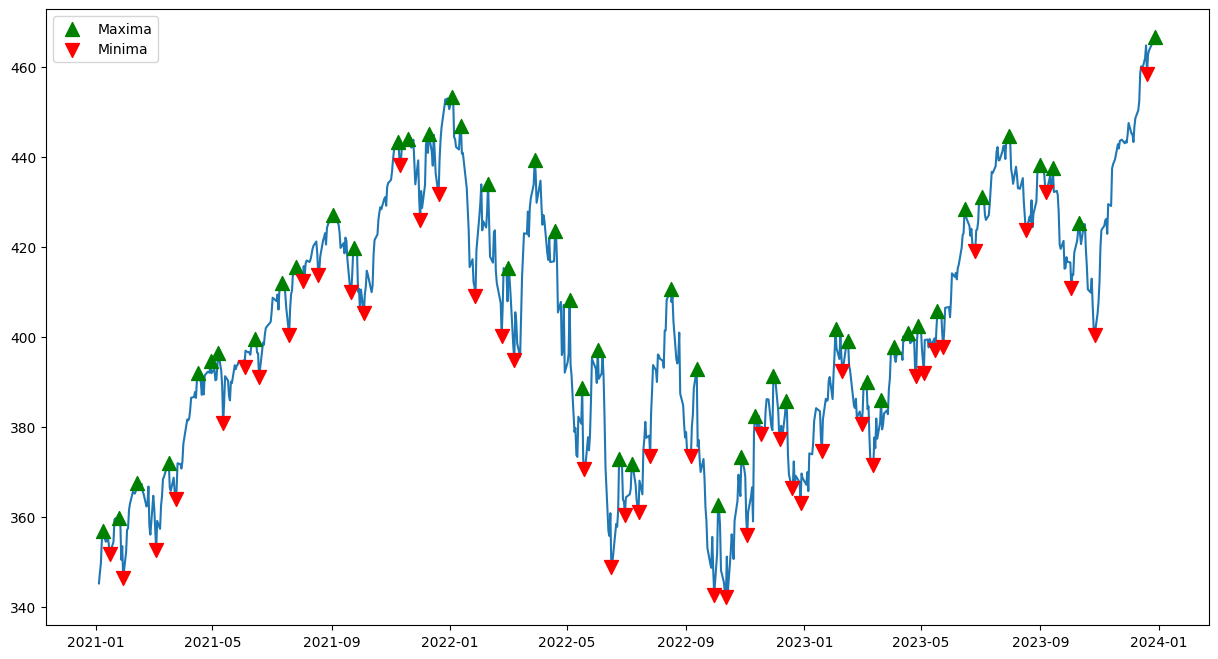

In [58]:
local_max = argrelextrema(data['Close'].values, np.greater, order=5)[0]
local_min = argrelextrema(data['Close'].values, np.less, order=5)[0]
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], zorder=0)
plt.scatter(data.iloc[local_max].index, data.iloc[local_max]['Close'],label='Maxima', s=100, color='green', marker='^', alpha=1)
plt.scatter(data.iloc[local_min].index, data.iloc[local_min]['Close'],label='Minima', s=100, color='red', marker='v', alpha=1)

# plt.scatter(df.index, up_signal , label='Buy',marker='^',color='green',alpha=1)
# plt.scatter(df.index, down_signal, label='Sell',marker='v',color='red',alpha=1)

plt.legend()
plt.show()

In [59]:
def GetHigherHighs(data, window):
  K = 2
  # Get highs
  high_idx = argrelextrema(data, np.greater, order=window)[0]
  highs = data[high_idx]
  # Ensure consecutive highs are higher than previous highs
  hh = []
  ex_deque = deque(maxlen=K)
  for i, idx in enumerate(high_idx):
    if i == 0:
      ex_deque.append(idx)
      continue
    if highs[i] < highs[i-1]:
      ex_deque.clear()

    ex_deque.append(idx)


    if len(ex_deque) == K:
      ex_dequeue_second_peak = ex_deque.copy()
      hh.append(ex_dequeue_second_peak)

  return hh

In [60]:
def GetHigherLows(data, window):
  K = 2
  # Get lows
  low_idx = argrelextrema(data, np.less, order=window)[0]
  lows = data[low_idx]
  # Ensure consecutive lows are higher than previous lows
  hl = []
  ex_deque = deque(maxlen=K)
  for i, idx in enumerate(low_idx):
    if i == 0:
      ex_deque.append(idx)
      continue
    if lows[i] < lows[i-1]:
      ex_deque.clear()

    ex_deque.append(idx)

    if len(ex_deque) == K:
      ex_dequeue_second_trough = ex_deque.copy()
      hl.append(ex_dequeue_second_trough)

  return hl

In [61]:
def GetLowerHighs(data, window):
  K = 2
  # Get highs
  high_idx = argrelextrema(data, np.greater, order=window)[0]
  highs = data[high_idx]
  # Ensure consecutive highs are lower than previous highs
  lh = []
  ex_deque = deque(maxlen=K)
  for i, idx in enumerate(high_idx):
    if i == 0:
      ex_deque.append(idx)
      continue
    if highs[i] > highs[i-1]:
      ex_deque.clear()

    ex_deque.append(idx)

    if len(ex_deque) == K:
      ex_dequeue_second_peak = ex_deque.copy()
      lh.append(ex_dequeue_second_peak)

  return lh

In [62]:
def GetLowerLows(data, window):
  K = 2
  # Get lows
  low_idx = argrelextrema(data, np.less, order=window)[0]
  lows = data[low_idx]
  # Ensure consecutive lows are lower than previous lows
  ll = []
  ex_deque = deque(maxlen=K)
  for i, idx in enumerate(low_idx):
    if i == 0:
      ex_deque.append(idx)
      continue
    if lows[i] > lows[i-1]:
      ex_deque.clear()

    ex_deque.append(idx)

    if len(ex_deque) == K:
      ex_dequeue_second_trough = ex_deque.copy()
      ll.append(ex_dequeue_second_trough)

  return ll

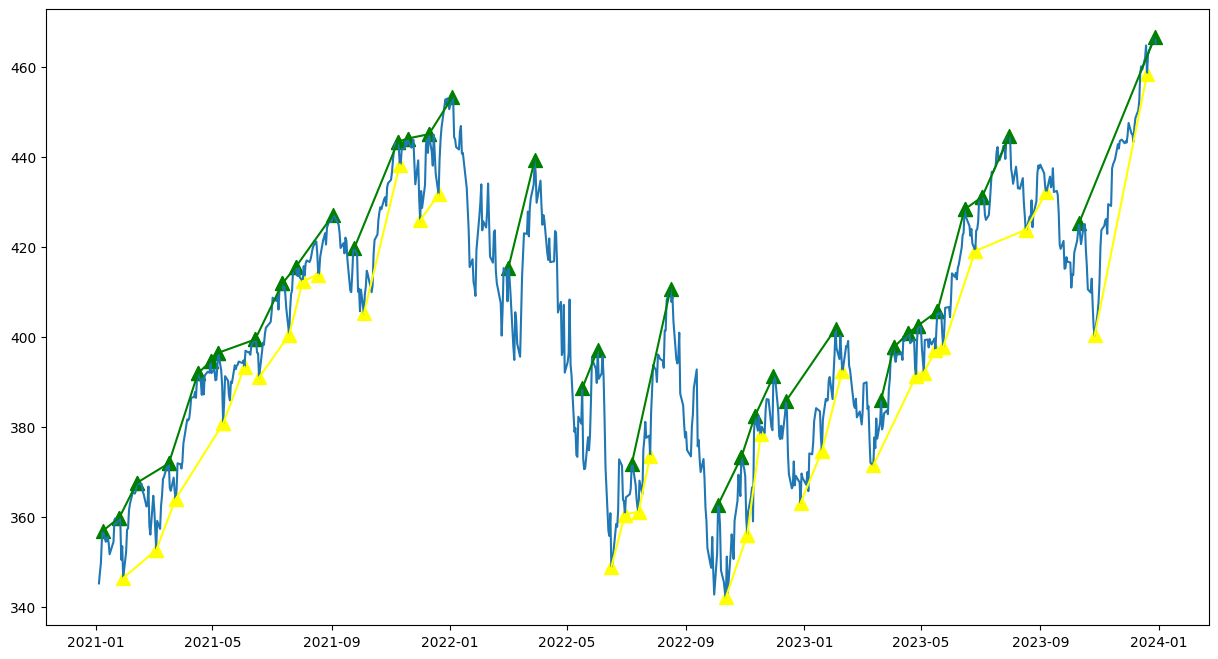

In [63]:
window = 5
close = data['Close'].values
dates = data.index
hh = GetHigherHighs(close, window)
hl = GetHigherLows(close, window)
plt.figure(figsize=(15, 8))
plt.plot(data['Close'])


for i in hh:
   plt.scatter(dates[i], close[i],label='Higher High', s=100, color='green', marker='^', alpha=1)
   plt.plot(dates[i], close[i], color='green')

for i in hl:
   plt.scatter(dates[i], close[i],label='Higher Low', s=100, color='yellow', marker='^', alpha=1)
   plt.plot(dates[i], close[i], color='yellow')

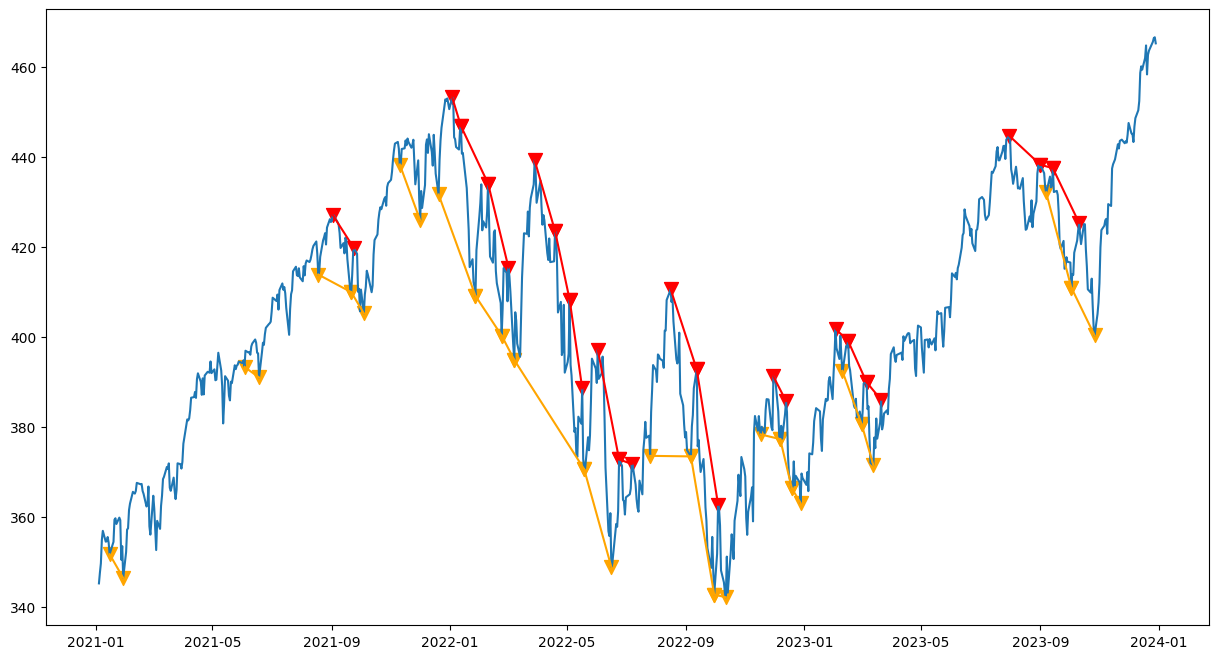

In [64]:
window = 5
close = data['Close'].values
dates = data.index
ll = GetLowerLows(close, window)
lh = GetLowerHighs(close, window)
plt.figure(figsize=(15, 8))
plt.plot(data['Close'])


for i in ll:
   plt.scatter(dates[i], close[i],label='Higher High', s=100, color='orange', marker='v', alpha=1)
   plt.plot(dates[i], close[i], color='orange')

for i in lh:
   plt.scatter(dates[i], close[i],label='Higher Low', s=100, color='red', marker='v', alpha=1)
   plt.plot(dates[i], close[i], color='red')